<a href="https://colab.research.google.com/github/aSafarpoor/Short-Project/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from random import random as rand
from random import randint

In [12]:
class MyGraph:
    def __init__(self,n,k):
        self.n = n
        self.k = k
        self.edges = []
        self.G = nx.Graph()
        self.nodes = np.zeros(n)
        self.nodes[0] = k
        self.nodes2 = np.copy(self.nodes)
        self.rounds = 0

    def create_cycle_graph(self):
        for i in range(self.n-1):
            self.G.add_edges_from([(i, i+1)])
            self.edges.append([i, i+1])
        self.G.add_edges_from([(self.n-1, 0)])
        self.edges.append([self.n-1, 0])
    
    def create_complete_graph(self):
        for i in range(self.n):
            for j in range(self.n):
                if i == j:
                    pass
                else:
                    self.G.add_edges_from([(i, j)])
                    self.edges.append([i, j])


    def show_simple_graph(self):
        colors = [] 
        for i in self.nodes:
            if i>0:
                colors.append('r')
            else:
                colors.append('b')

        # nx.draw(self.G, cmap = plt.get_cmap('jet'), node_size = 100, node_color = colors)
        nx.draw(self.G, node_size = 100, node_color = colors)
        plt.title(f"Round: {self.rounds}")
        plt.show()

    def setk(self,a):
        if a>0:
            return self.k
        return 0

    def propagation_binary_cycle(self,times=1):
        for _ in range(times):
            self.rounds += 1
            self.nodes2 = np.copy(self.nodes)
            for i in range(self.n):
                if self.nodes[i] > 1:
                    self.nodes2[i] -=1
                else:
                    if rand()>0.5:
                        self.nodes2[i] = self.setk(self.nodes[i-1])
                    else:
                        if i >= self.n-1:
                            self.nodes2[i] = self.setk(self.nodes[0]) 
                        else:   
                            self.nodes2[i] = self.setk(self.nodes[i+1])
            self.nodes = np.copy(self.nodes2)
        
    def propagation_binary_complete(self,times=1):
        for _ in range(times):
            self.nodes2 = np.copy(self.nodes)
            w = np.sum(self.nodes>0)
            self.rounds += 1
            for i in range(self.n):
                if self.nodes[i] > 1:
                    self.nodes2[i] -= 1
                else:
                    z = i
                    while (z == i):
                        z = randint(0,self.n-1)    
                    self.nodes2[i] = self.setk(self.nodes[z])
                    w = w - 1 + self.nodes2[i]>0
            self.nodes = np.copy(self.nodes2)

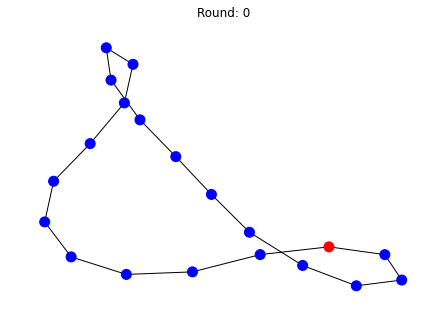

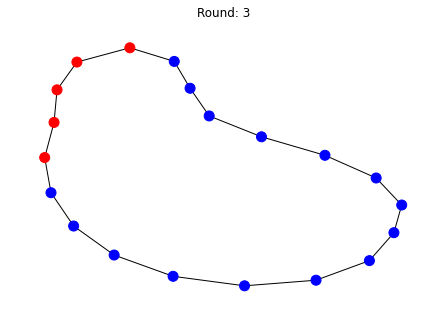

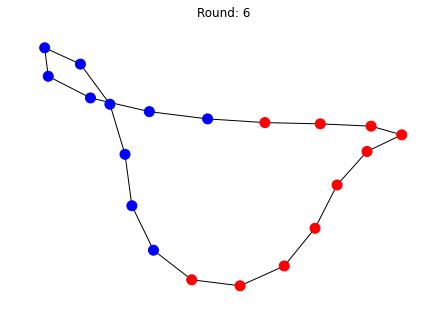

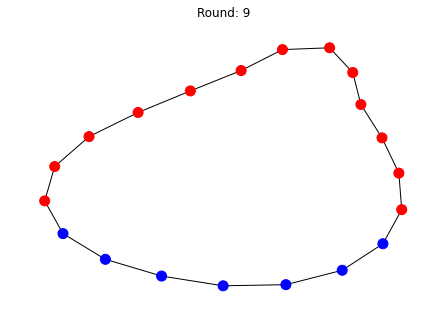

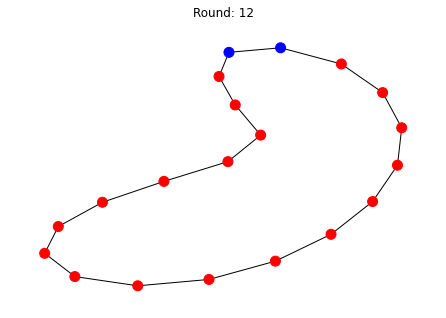

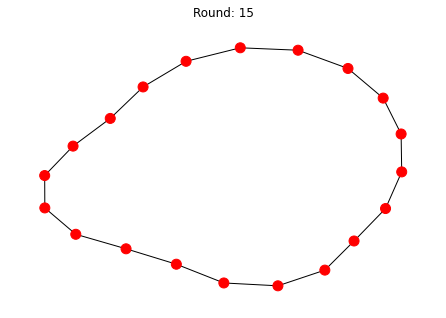

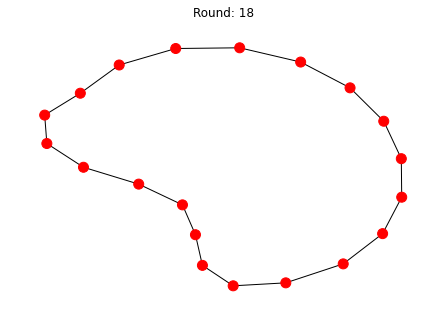

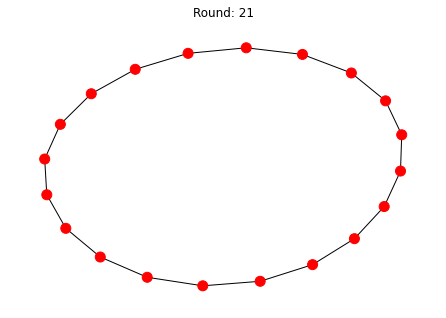

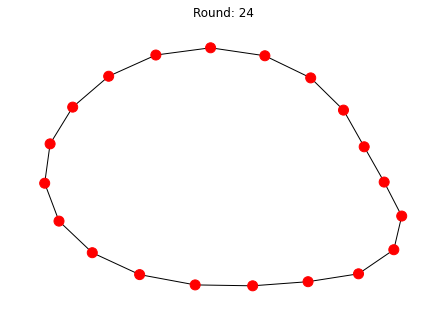

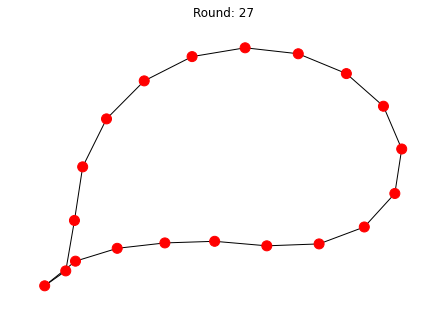

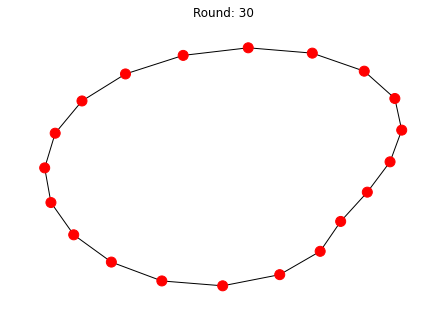

In [13]:
graph = MyGraph(n = 20,k = 5)
graph.create_cycle_graph()
graph.show_simple_graph()

for i in range(10):
    graph.propagation_binary_cycle(times=3)
    graph.show_simple_graph()

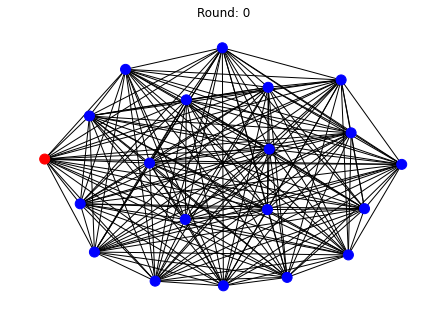

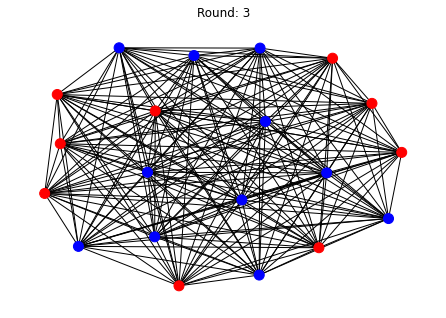

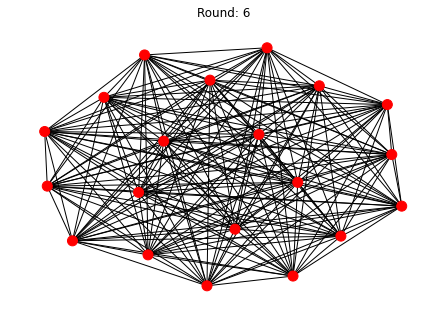

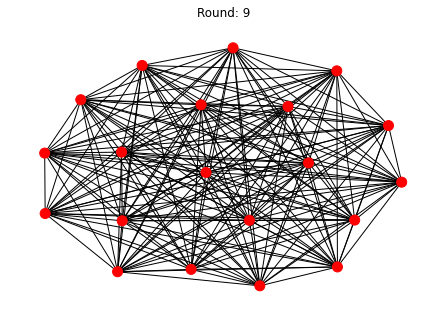

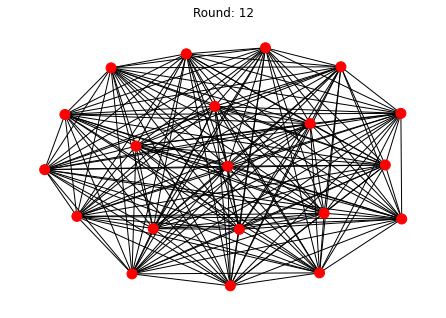

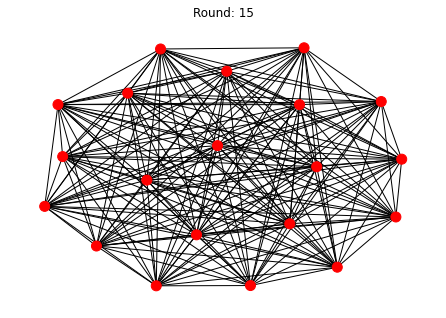

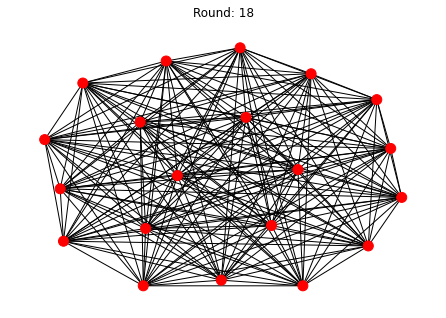

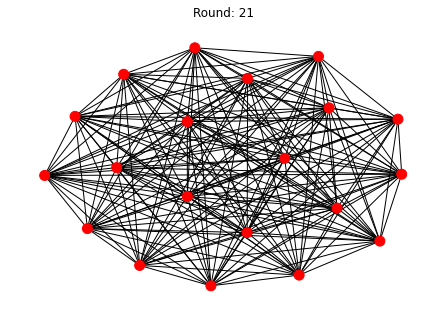

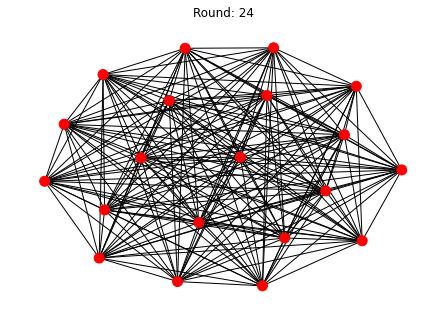

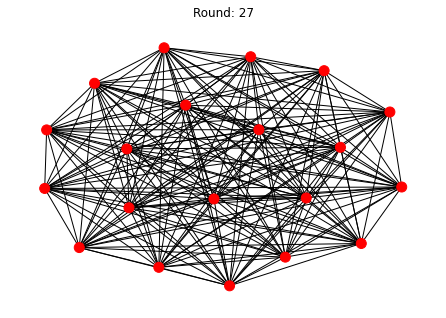

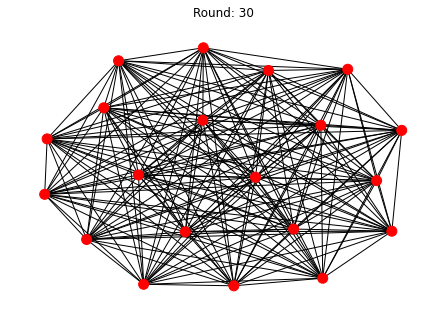

In [14]:
graph = MyGraph(n = 20,k = 5)
graph.create_complete_graph()
graph.show_simple_graph()

for i in range(10):
    graph.propagation_binary_complete(times=3)
    graph.show_simple_graph()
# graph.show_simple_graph()


  0%|          | 0/1000 [00:00<?, ?it/s]

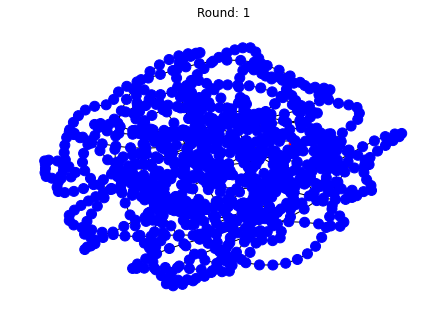

 17%|█▋        | 166/1000 [00:06<00:19, 41.89it/s]

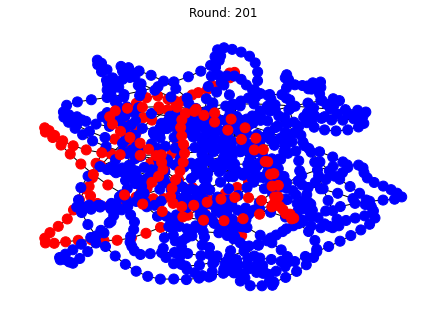

 32%|███▏      | 321/1000 [00:15<00:26, 25.65it/s]

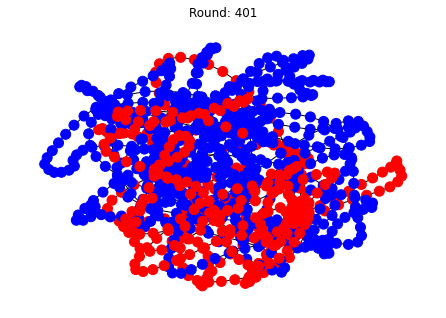

 59%|█████▊    | 586/1000 [00:22<00:09, 43.83it/s]

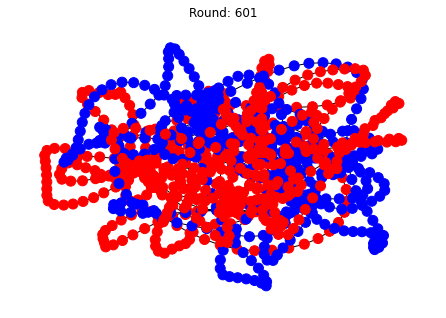

 75%|███████▌  | 753/1000 [00:28<00:06, 37.55it/s]

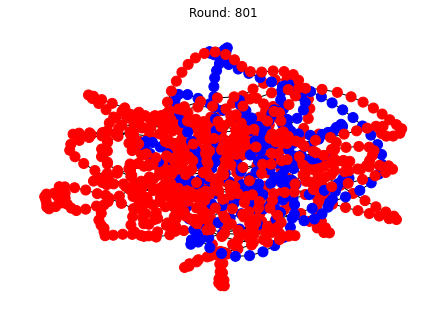

100%|██████████| 1000/1000 [00:35<00:00, 27.91it/s]


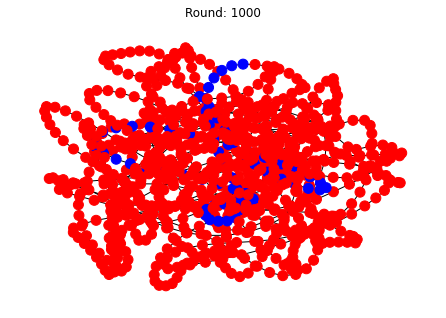

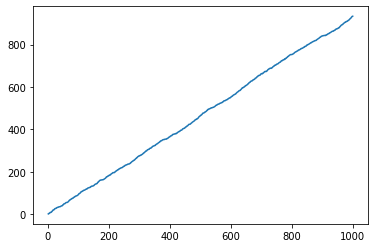

In [21]:
graph = MyGraph(n = 1000,k = 5)
graph.create_cycle_graph()

y = []
for i in tqdm(range(1000)):
    graph.propagation_binary_cycle(times=1)
    y.append(np.sum(graph.nodes>0))

    if i%200 ==0:
        graph.show_simple_graph()

graph.show_simple_graph()

plt.plot(list(range(1,1001)),y)

  0%|          | 0/1000 [00:00<?, ?it/s]

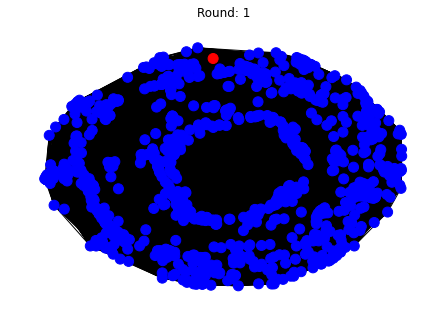

 18%|█▊        | 182/1000 [00:49<00:46, 17.69it/s]

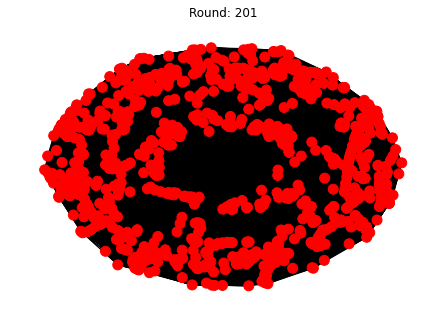

 37%|███▋      | 368/1000 [01:29<00:47, 13.27it/s]

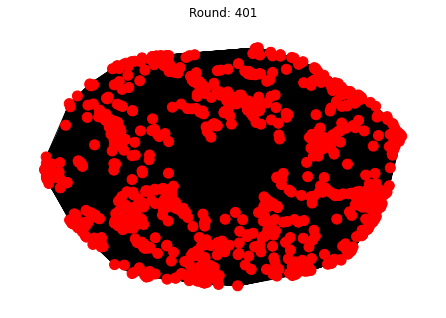

 56%|█████▋    | 564/1000 [01:59<00:34, 12.61it/s]

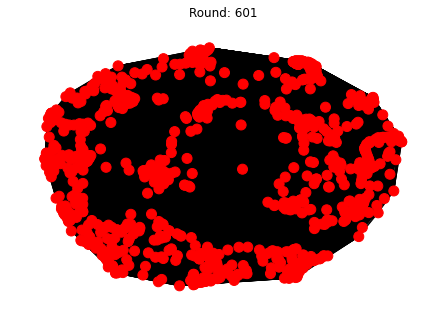

 77%|███████▋  | 769/1000 [02:39<00:18, 12.76it/s]

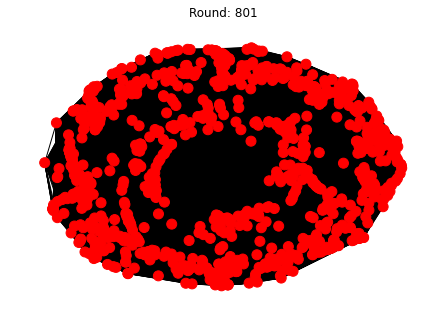

100%|██████████| 1000/1000 [03:01<00:00,  5.50it/s]


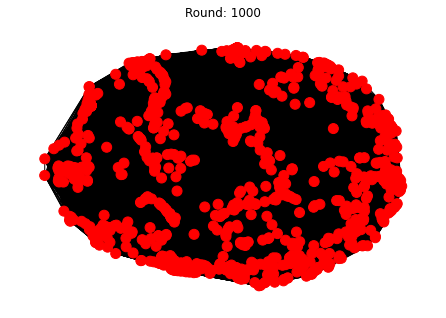

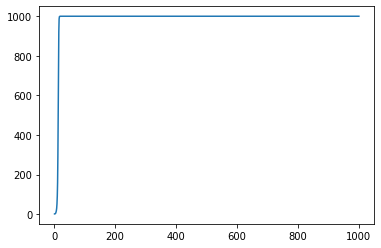

In [22]:
graph = MyGraph(n = 1000,k = 5)
graph.create_complete_graph()

y = []
for i in tqdm(range(1000)):
    graph.propagation_binary_complete(times=1)
    y.append(np.sum(graph.nodes>0))

    if i%200 ==0:
        graph.show_simple_graph()

graph.show_simple_graph()

plt.plot(list(range(1,1001)),y)

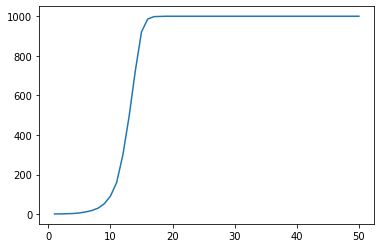

In [25]:
plt.plot(list(range(1,51)),y[:50])
